<a href="https://www.kaggle.com/code/taf1404/exploring-unlabeled-data-with-pca?scriptVersionId=123860609" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Assignment-4

In this assignment we are asked to explore the dataset, get insights and explain to our managers in a simple way

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

We read the data with pandas library

In [2]:
df = pd.read_csv('/kaggle/input/assignment-4/dataset.csv')
df

param_132   type  is_measured  normal_values  % of normal values  \
0            464     AC            0           0.77                   4   
1            670  AC/DC            0           0.03                  98   
2            903  AC/DC            0           0.73                   6   
3            857     AC            0           0.40                  47   
4           7725     AC            1           0.58                  31   
...          ...    ...          ...            ...                 ...   
23006        689  AC/DC            0           0.25                   3   
23007        578  AC/DC            0           0.40                  66   
23008        700  AC/DC            0           0.91                  82   
23009         33  AC/DC            0           0.05                  88   
23010      13289     AC            1           0.29                   0   

       param dist.  
0              160  
1               26  
2              510  
3              802  
4              729  
...            ...  
23006          699  
23007          488  
23008          113  
23009          366  
23010           84  

[23011 rows x 6 columns]

# Explore 

Since we don't have any information where is data came from and columns means we try to explore them one by one and see is there any correlations

Getting basic informations about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   param_132           23011 non-null  int64  
 1   type                23011 non-null  object 
 2   is_measured         23011 non-null  int64  
 3   normal_values       23011 non-null  float64
 4   % of normal values  23011 non-null  int64  
 5   param dist.         23011 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.1+ MB


In [4]:
df.describe()

param_132   is_measured  normal_values  % of normal values  \
count  23011.000000  23011.000000   23011.000000        23011.000000   
mean    4448.269263      0.411238       0.498768           50.045326   
std     5984.922921      0.492069       0.290600           28.995487   
min        1.000000      0.000000       0.000000            0.000000   
25%      409.000000      0.000000       0.250000           25.000000   
50%      825.000000      0.000000       0.500000           50.000000   
75%     8006.500000      1.000000       0.750000           75.000000   
max    23422.000000      1.000000       1.000000          100.000000   

        param dist.  
count  23011.000000  
mean     501.301378  
std      290.043697  
min        0.000000  
25%      249.000000  
50%      506.000000  
75%      752.000000  
max     1000.000000

In [5]:
df.isnull().sum()

param_132             0
type                  0
is_measured           0
normal_values         0
% of normal values    0
param dist.           0
dtype: int64

Try to find any correlation between columns with pairplot

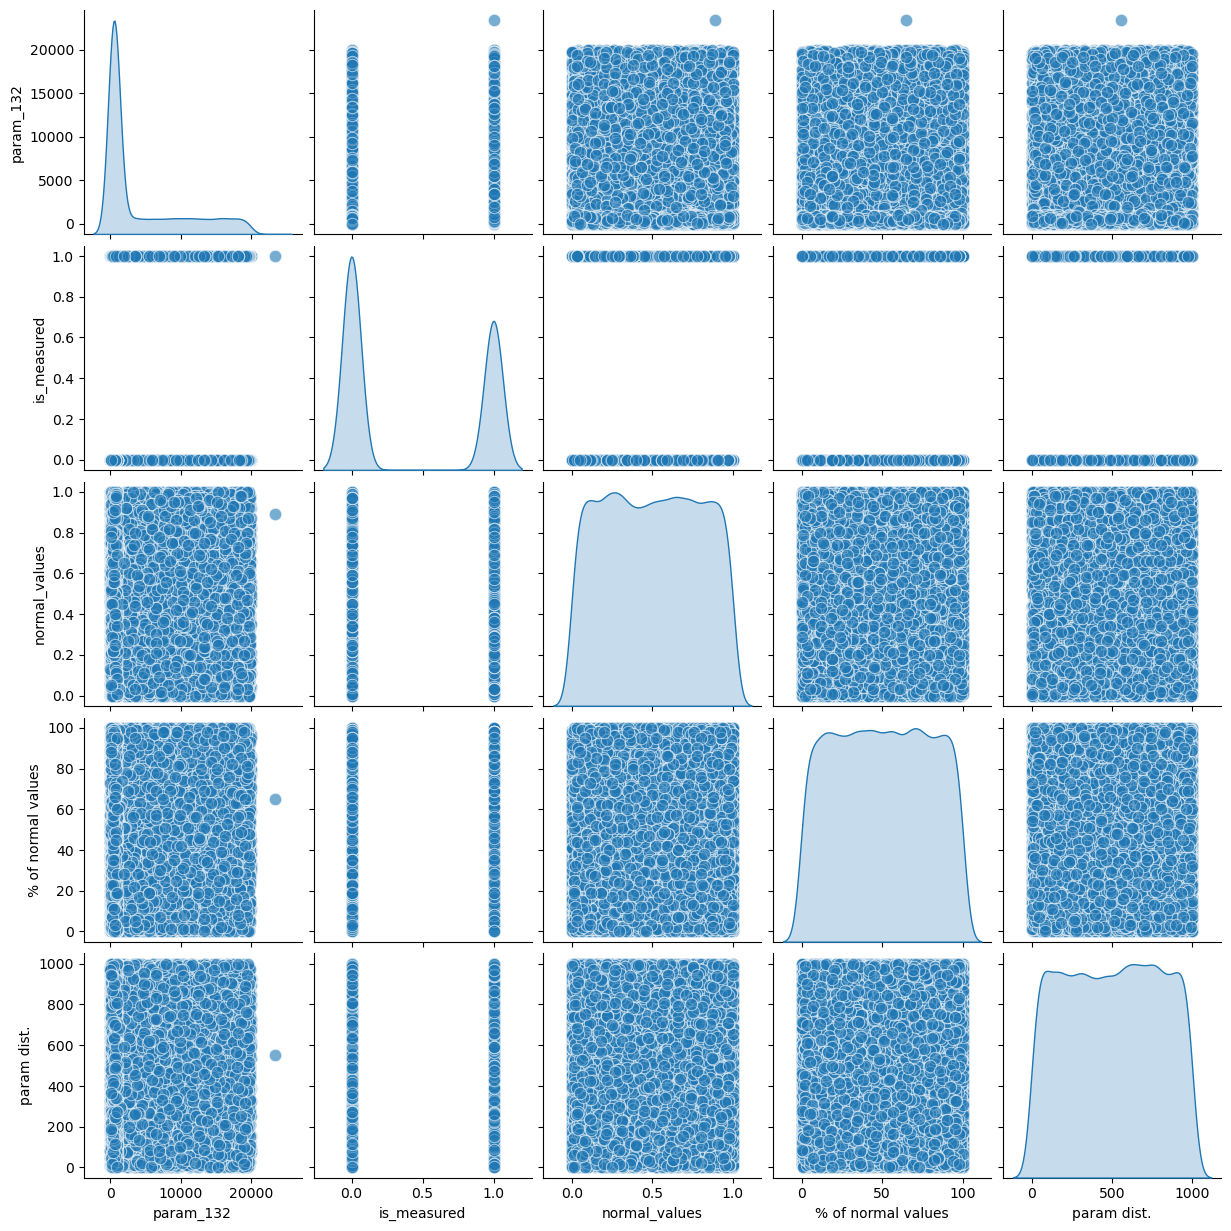

In [6]:
sns.pairplot(df, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80})

It can be seen that we couldn't get much information with pairplot so let's try to use different methods

<AxesSubplot:xlabel='type', ylabel='count'>

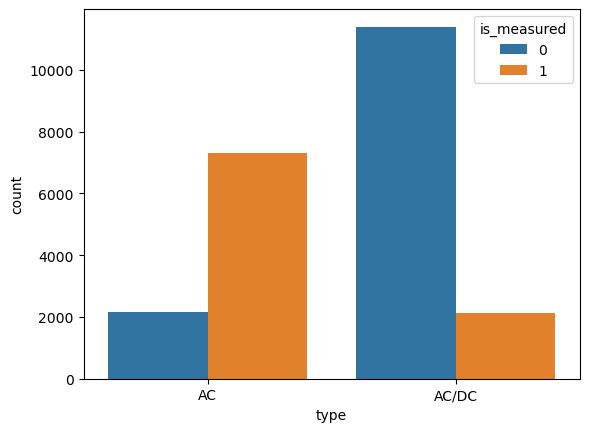

In [7]:
sns.countplot(data=df,x='type',hue='is_measured',)

Most of `AC` types are measured while larg part of `AC/DC` types are not measured 

`% of normal values` and `normal_values` seems related let's plot

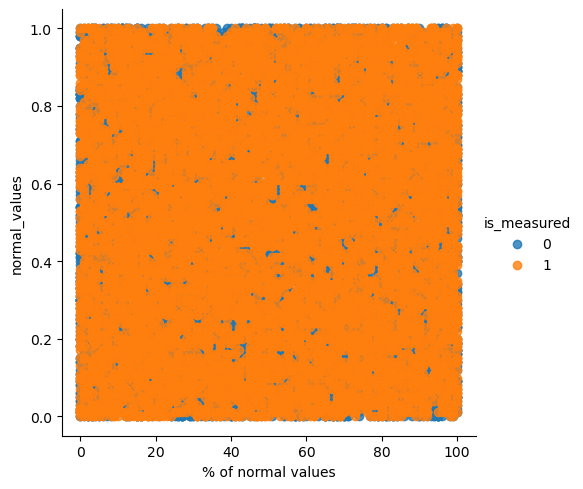

In [8]:
sns.lmplot(
    x="% of normal values", y="normal_values", data=df, hue="is_measured", fit_reg=False
);

This values are completely not correlated 

Now, Let's `param_132` and `param dist`

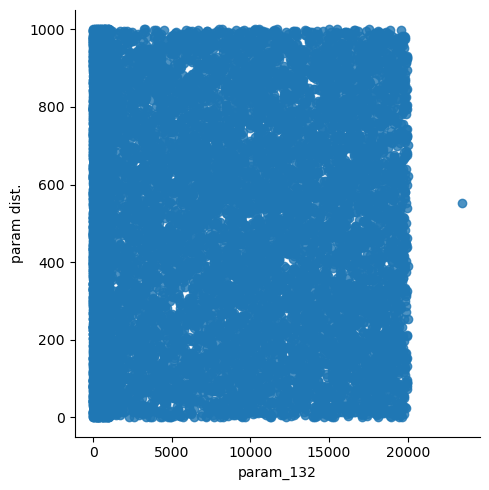

In [9]:
sns.lmplot(
    x="param_132", y="param dist.", data=df, fit_reg=False
);

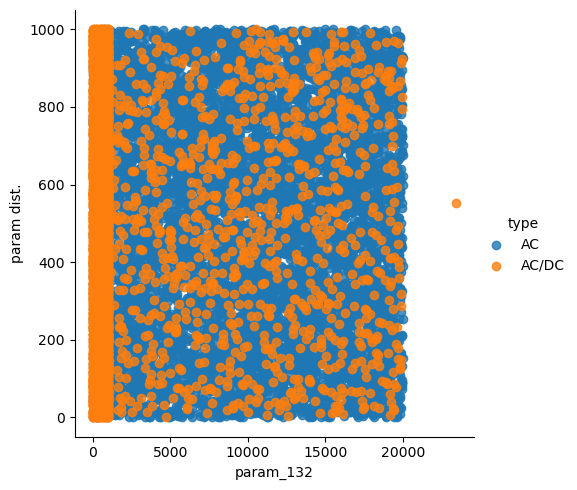

In [10]:
sns.lmplot(
    x="param_132", y="param dist.", data=df, hue="type", fit_reg=False
);

There is not much correlation between `param_132` and `param dist`, but when we add type column in this visualization we can see that `AC/DC` types are mostly left side of graph

Let's try`param_132`,`type` and `is_measured` combination

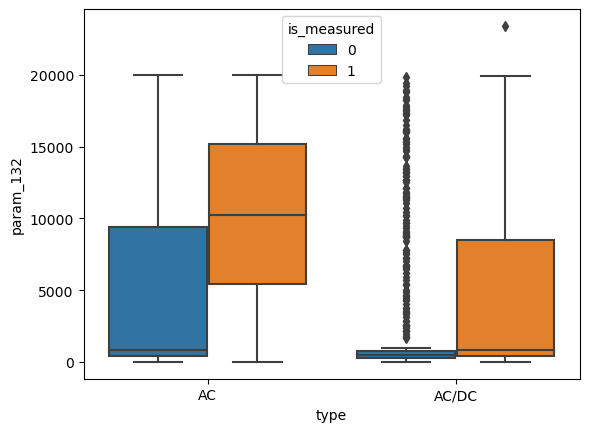

In [11]:
sns.boxplot(
    y="param_132", x="type", data=df,hue='is_measured'
);

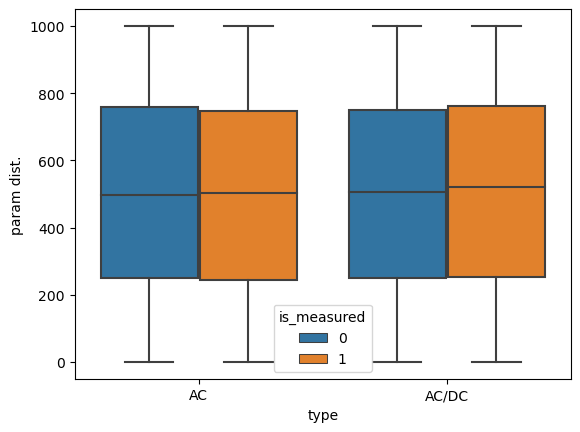

In [12]:
sns.boxplot(
    y="param dist.", x="type", data=df,hue='is_measured'
);

since the models cannot read categorical values(`type` column) we need to convert them into numerical, for this we use pandas `get_dummies`

In [13]:
df = pd.get_dummies(df, columns=['type'])

Visualize Whole dataset

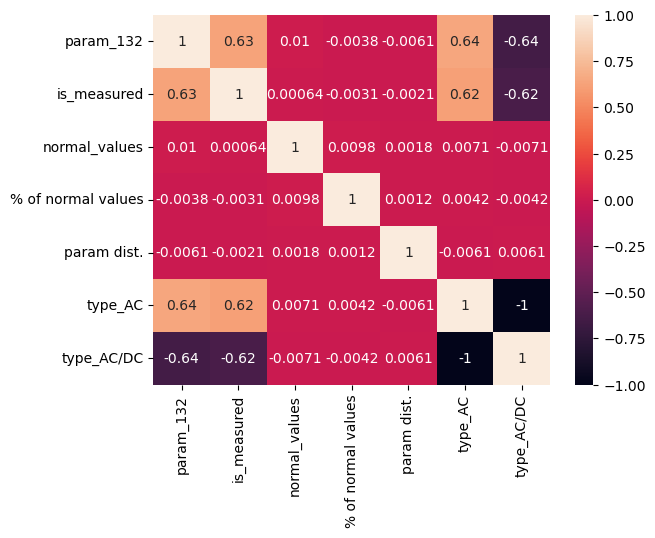

In [14]:
sns.heatmap(df.corr(), annot =True )
sns.set(rc = {'figure.figsize':(8,8)})
plt.show()

# Dimensiality reduction
Let's try to use dimensiality reudction for better visualize becuase it can maybe show new patterns.
Since there are lots of reduction techniques i want to use some of them to see which one gives more insight

we try `t-SNE`, `PCA`, `LLE`, or `MDS`


Since PCA other techniques are sensetive to scaling and centering, we use `standartscaler`.

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(df)
std_df = pd.DataFrame(std_data,columns=list(df.columns))
std_df

param_132  is_measured  normal_values  % of normal values  param dist.  \
0      -0.665732    -0.835751       0.933372           -1.588051    -1.176750   
1      -0.631312    -0.835751      -1.613135            1.653903    -1.638759   
2      -0.592380    -0.835751       0.795723           -1.519074     0.029991   
3      -0.600066    -0.835751      -0.339881           -0.105030     1.036758   
4       0.547509     1.196529       0.279539           -0.656852     0.785066   
...          ...          ...            ...                 ...          ...   
23006  -0.628137    -0.835751      -0.856065           -1.622540     0.681631   
23007  -0.646684    -0.835751      -0.339881            0.550259    -0.045861   
23008  -0.626299    -0.835751       1.415144            1.102081    -1.338798   
23009  -0.737748    -0.835751      -1.544311            1.309014    -0.466496   
23010   1.477199     1.196529      -0.718416           -1.726007    -1.438785   

        type_AC  type_AC/DC  
0      1.195778   -1.195778  
1     -0.836276    0.836276  
2     -0.836276    0.836276  
3      1.195778   -1.195778  
4      1.195778   -1.195778  
...         ...         ...  
23006 -0.836276    0.836276  
23007 -0.836276    0.836276  
23008 -0.836276    0.836276  
23009 -0.836276    0.836276  
23010  1.195778   -1.195778  

[23011 rows x 7 columns]

## PCA

since we don't know what number of compenents would be great for us we use `elbow` method

In [16]:
pca = PCA()
pca.fit(std_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

6

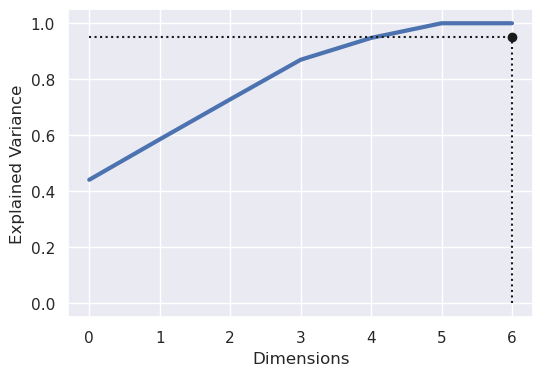

In [17]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
# plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

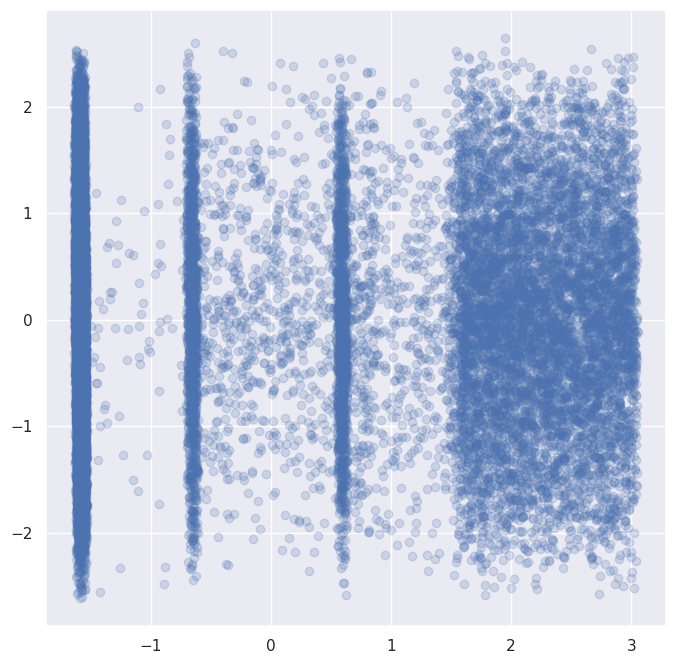

In [18]:
pca = PCA(n_components=6)
pca_data = pca.fit_transform(std_df)


plt.plot(pca_data[:, 0], pca_data[:, 1], "bo",alpha=0.2)

by reducing alpha we can see that dataset is divided into 4 groups

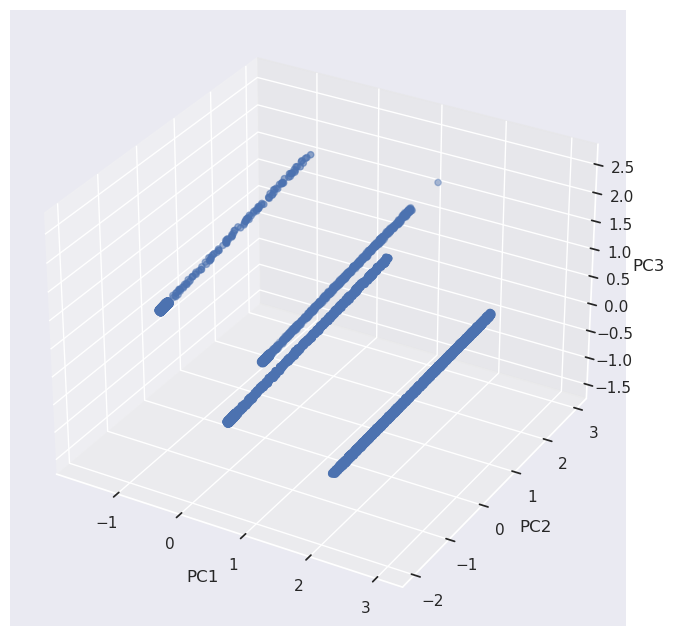

In [19]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=6)
pca_data = pca.fit_transform(std_df)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:,0], pca_data[:,4], pca_data[:,5])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

## Randomized PCA

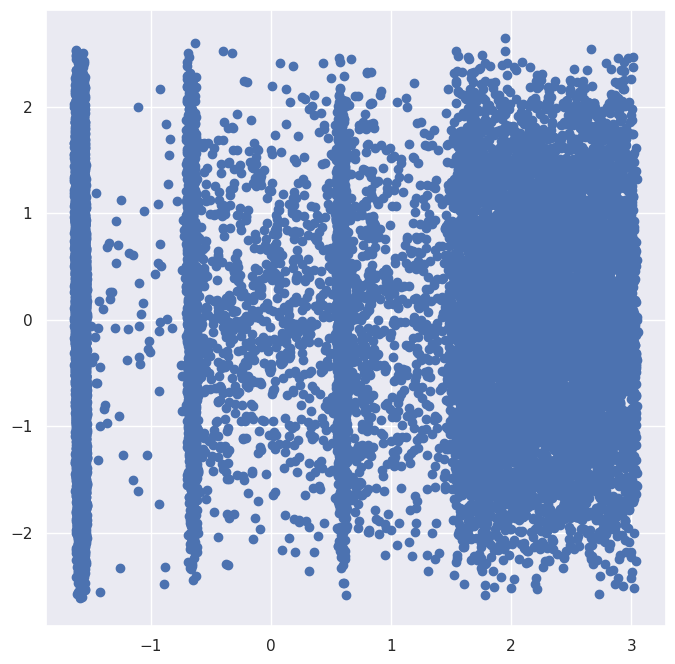

In [20]:
rnd_pca = PCA(n_components=6, svd_solver="randomized", random_state=42)
pca_reduced = rnd_pca.fit_transform(std_df)
plt.plot(pca_reduced[:, 0], pca_reduced[:, 1], "bo")

# Kernel PCA

linear


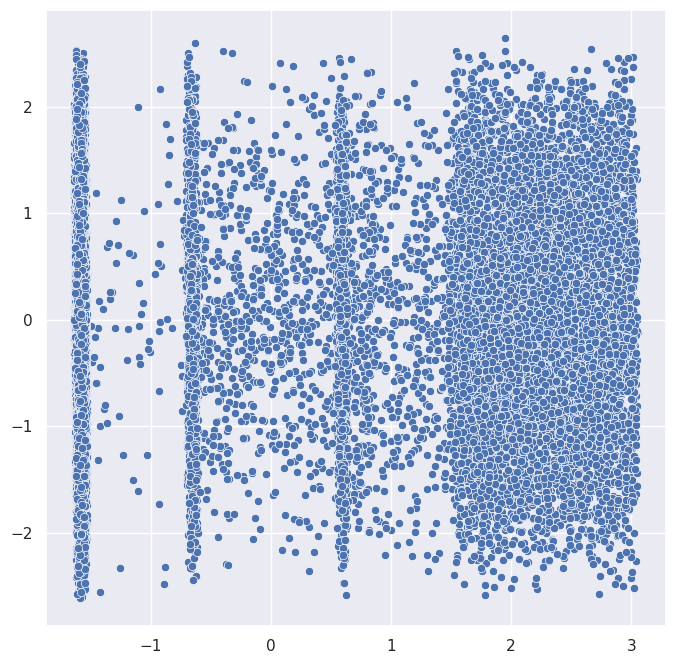

poly


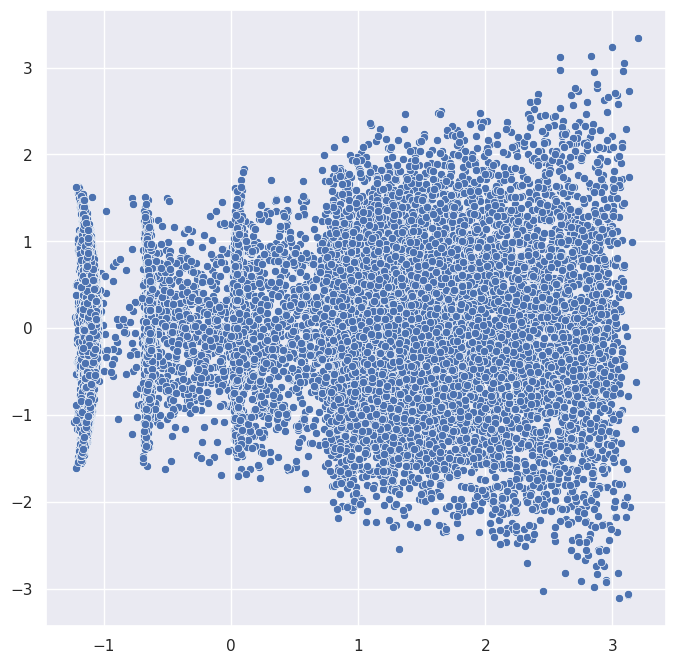

rbf


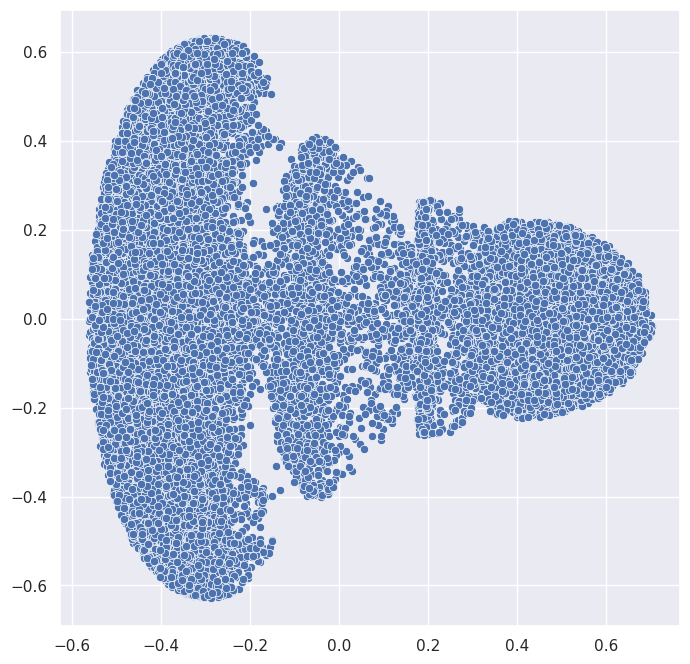

sigmoid


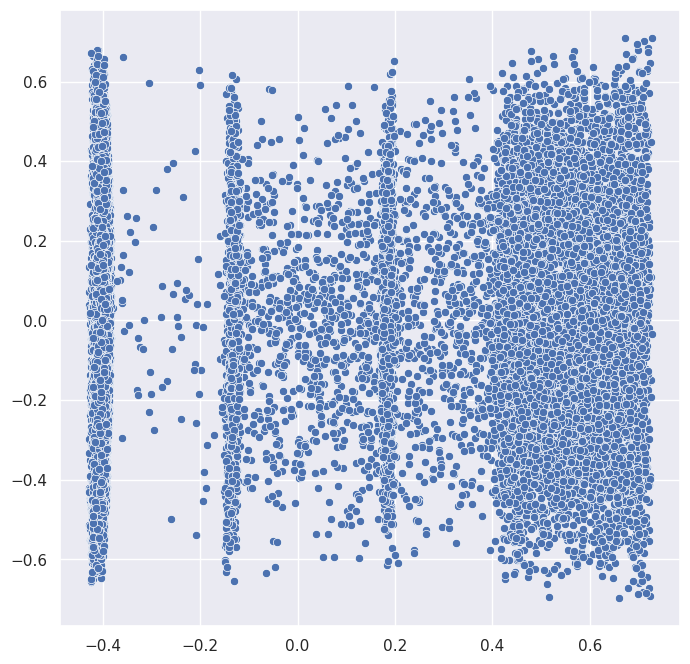

cosine


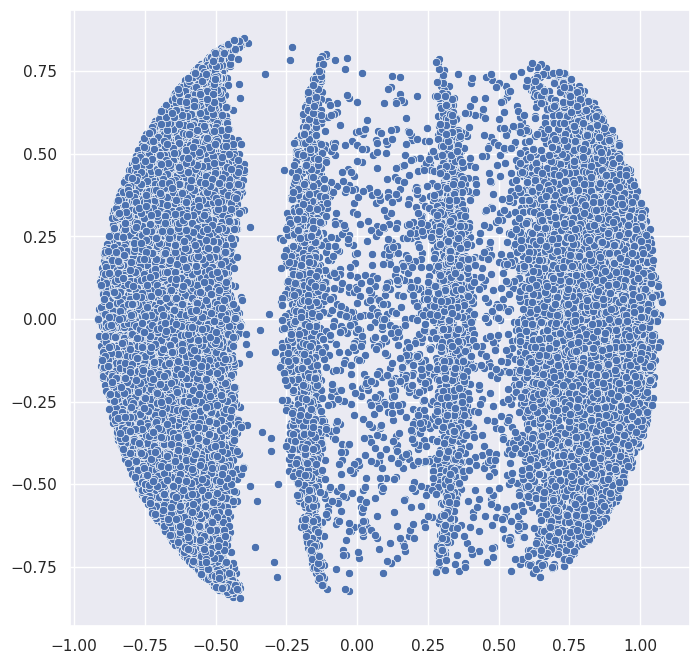

In [21]:
from sklearn.decomposition import KernelPCA

kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
for ker in kernels:
    print(ker)
    k_pca = KernelPCA(n_components = 6, kernel=ker) 
    k_data = k_pca.fit_transform(std_df)
    sns.scatterplot(x=k_data[:,0], y=k_data[:,1])
    plt.show()

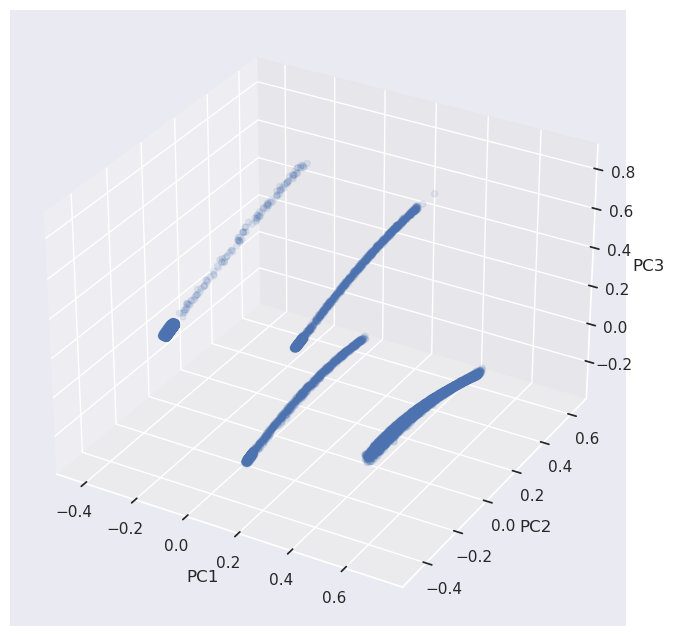

In [22]:
k_pca = KernelPCA(n_components = 6, kernel='sigmoid') 
k_data = k_pca.fit_transform(std_df)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(k_data[:,0], k_data[:,4], k_data[:,5],alpha=0.1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

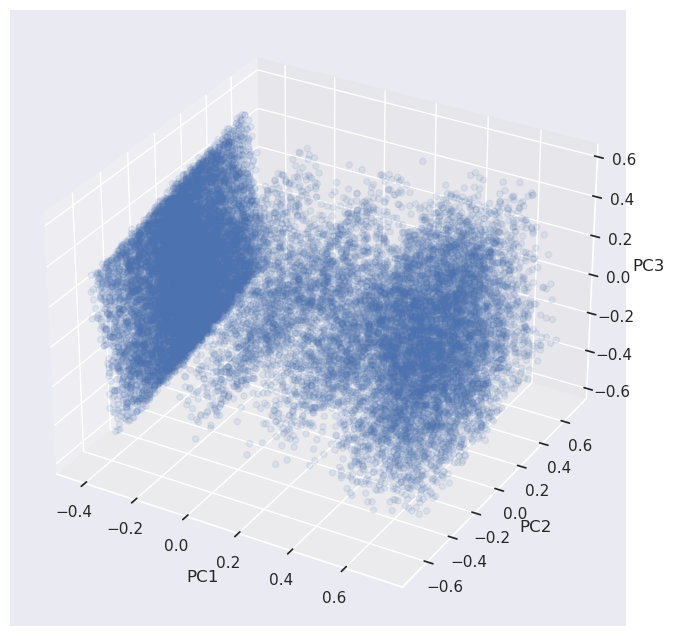

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(k_data[:,0], k_data[:,1], k_data[:,2],alpha=0.1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [24]:
# from sklearn.manifold import MDS
# mds = MDS(n_components=2)
# mds_data = mds.fit_transform(std_df)
# mds_df = pd.DataFrame(data=mds_data,columns=('1st_principal','2nd_principal'))
# sns.FacetGrid(mds_df,height=4).map(plt.scatter,'1st_principal','2nd_principal')
# plt.show()
# it using more memory

In [25]:
# from sklearn.manifold import LocallyLinearEmbedding 
# lle = LocallyLinearEmbedding(n_components=6, n_neighbors=10)
# lle_data = lle.fit_transform(std_df)
# sns.scatterplot(x=lle_data[:,0], y=lle_data[:,1])
# plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


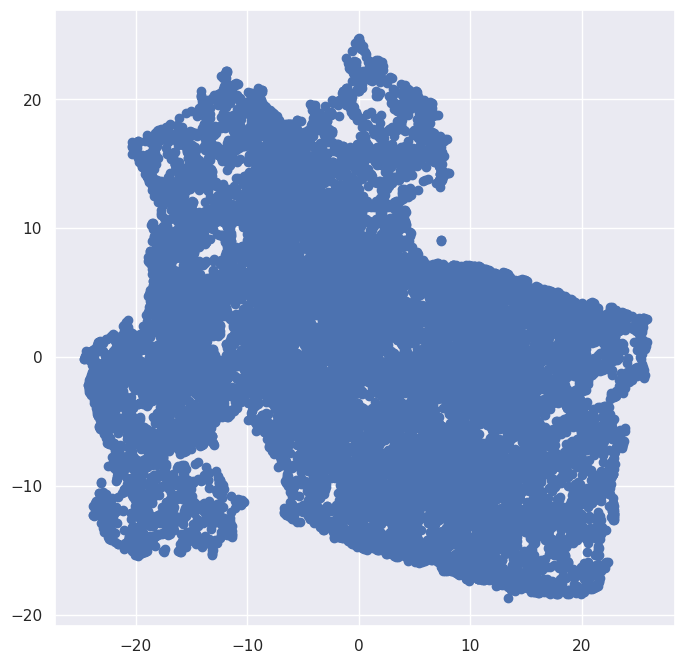

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
tsne_data = tsne.fit_transform(std_df)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

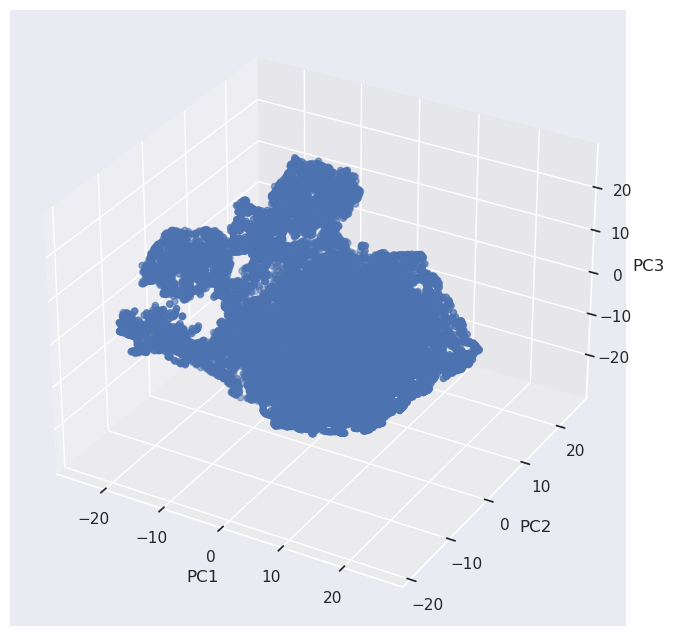

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:,0], tsne_data[:,1], tsne_data[:,2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

After trying different techniques we managed to get something only from `KernelPCA(sigmoid)` and `PCA`, it shows that our data divided into 4 groups 

Let's try to use some unsupervised technique

# KMeans

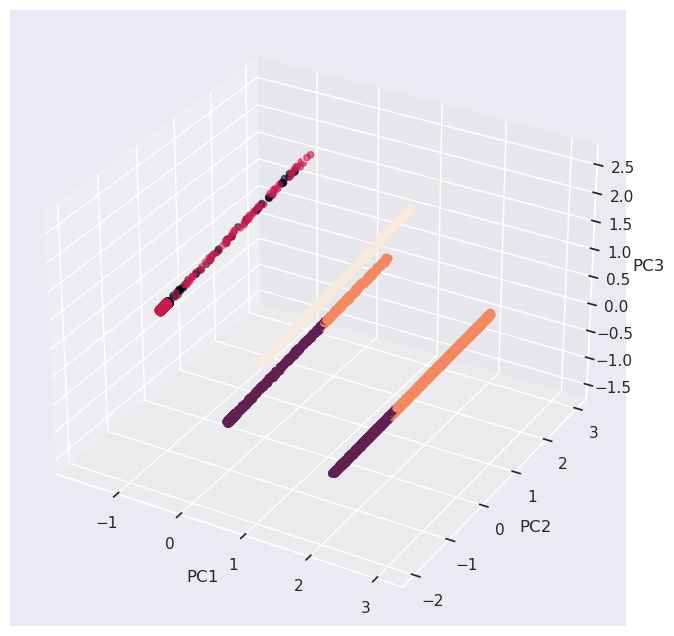

In [28]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=5, init="random", 
                     algorithm="full", random_state=0)
kmeans.fit(pca_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:,0], pca_data[:,4], pca_data[:,5],c=kmeans.labels_)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

2D

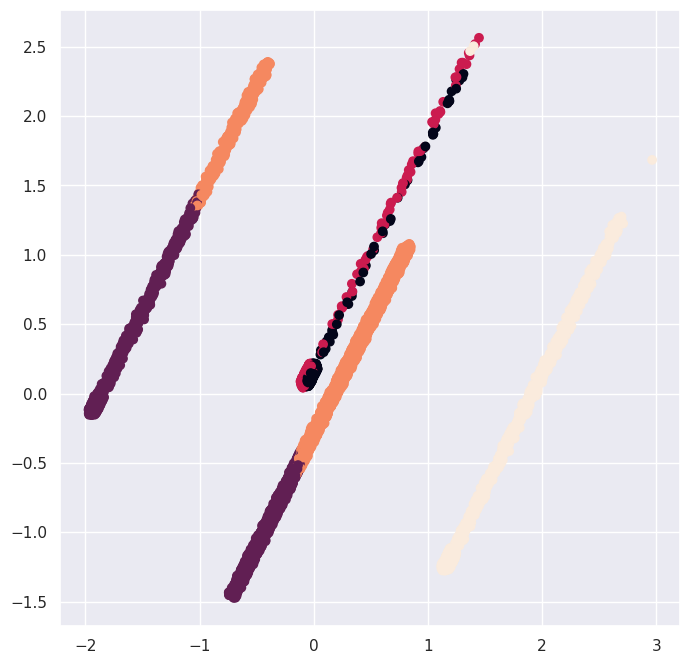

In [29]:
plt.scatter(pca_data[:,4], pca_data[:,5],c=kmeans.labels_)

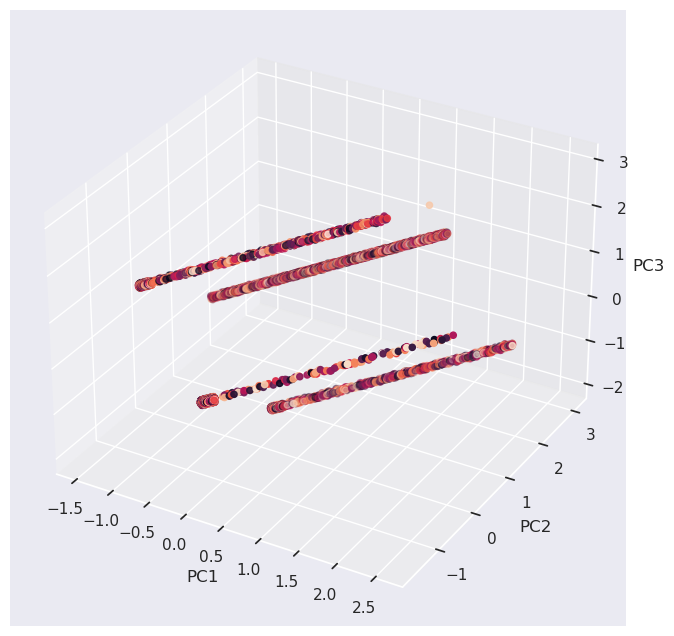

In [30]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=4, algorithm='ball_tree')
knn.fit(pca_data)
distances, indices = knn.kneighbors(pca_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:,5], pca_data[:,0], pca_data[:,4],c=indices[:,1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### Note
We explore that our dataset divided into 4 groups from PCA visualizations, to strength our findings i tried to use KMeans but It doesn't help much